In [74]:
import pandas as pd #data manipulation and cleaning
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [75]:
df= pd.read_csv('Retail Sales Analysis dataset.csv')

In [76]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [77]:
#drop null values
df.dropna(inplace=True)

In [78]:
#rename column
df.rename(columns={'quantiy':'quantity'},inplace=True)

**UNIVARIATE ANALYSIS**

In [79]:
df.describe()

,transactions_id,customer_id,age,quantity,price_per_unit,cogs,total_sale
count,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000
mean,1000.513337,66.284852,41.351283,2.51384,179.924509,95.081933,457.086059
std,578.274413,44.964430,13.662653,1.13277,189.441178,122.032280,560.862242
min,1.000000,1.000000,18.000000,1.00000,25.000000,6.250000,25.000000
25%,499.500000,24.000000,29.000000,1.00000,30.000000,13.000000,60.000000
50%,1001.000000,69.000000,42.000000,3.00000,50.000000,27.500000,150.000000
75%,1502.500000,102.000000,53.000000,4.00000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.00000,500.000000,620.000000,2000.000000


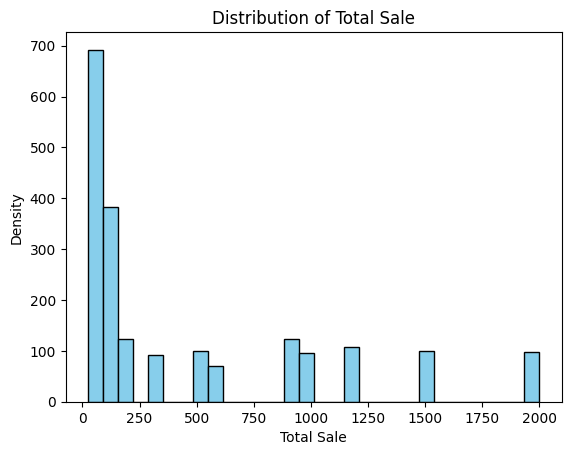

In [80]:
plt.hist(df['total_sale'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sale')
plt.xlabel('Total Sale')
plt.ylabel('Density')
plt.show()

In [81]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

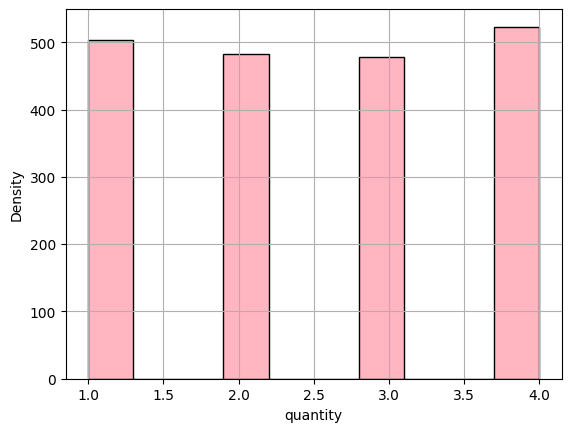

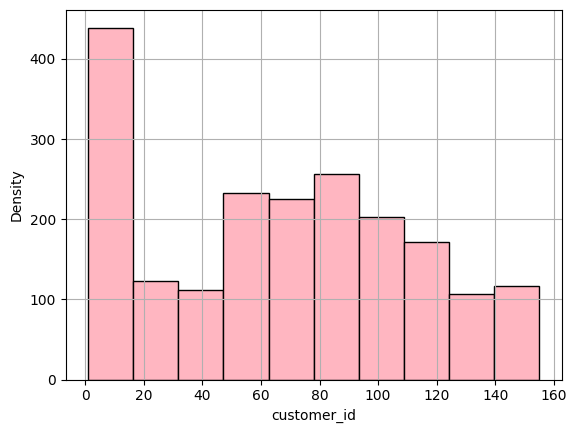

In [82]:
columns = ['quantity', 'customer_id'] 

for i in columns:
    plt.figure()
    plt.hist(df[i].dropna(),color='lightpink', edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

<Axes: xlabel='age', ylabel='Density'>

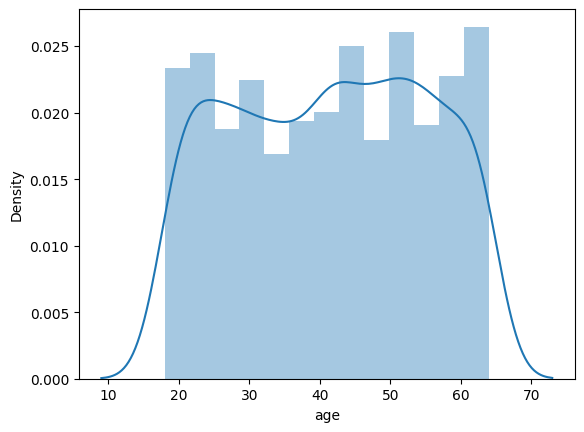

In [83]:
sns.distplot(df['age'])

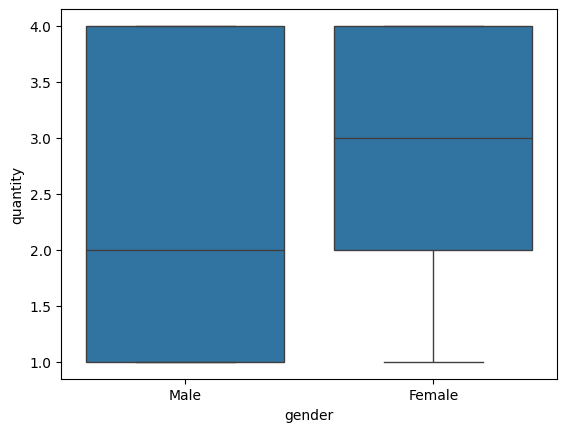

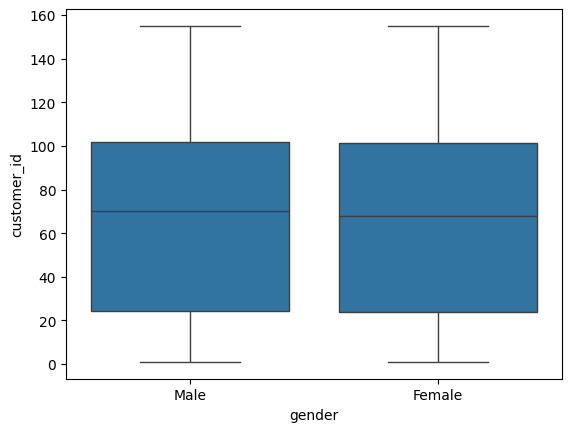

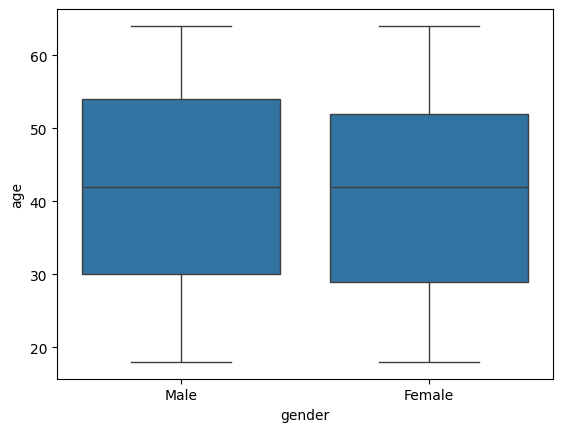

In [84]:
columns = ['quantity', 'customer_id','age'] 

for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='gender',y=df[i])

In [85]:
df['gender'].value_counts(normalize=True) #normalize to see count in percentage

gender
Female    0.509311
Male      0.490689
Name: proportion, dtype: float64

**BIVARIATE ANALYSIS**

<Axes: xlabel='total_sale', ylabel='age'>

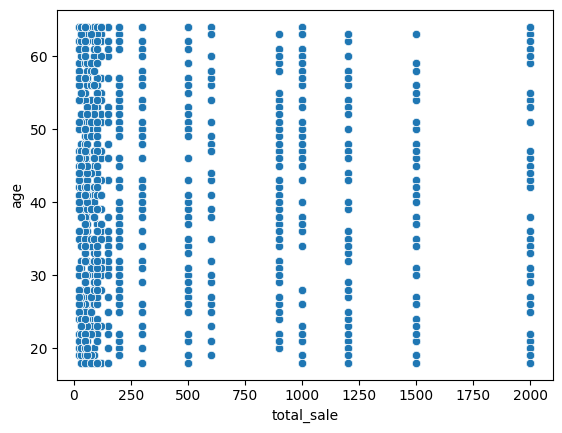

In [86]:
sns.scatterplot(data=df,x='total_sale',y='age' )

In [87]:
#sns.pairplot(df) use to see columns plots

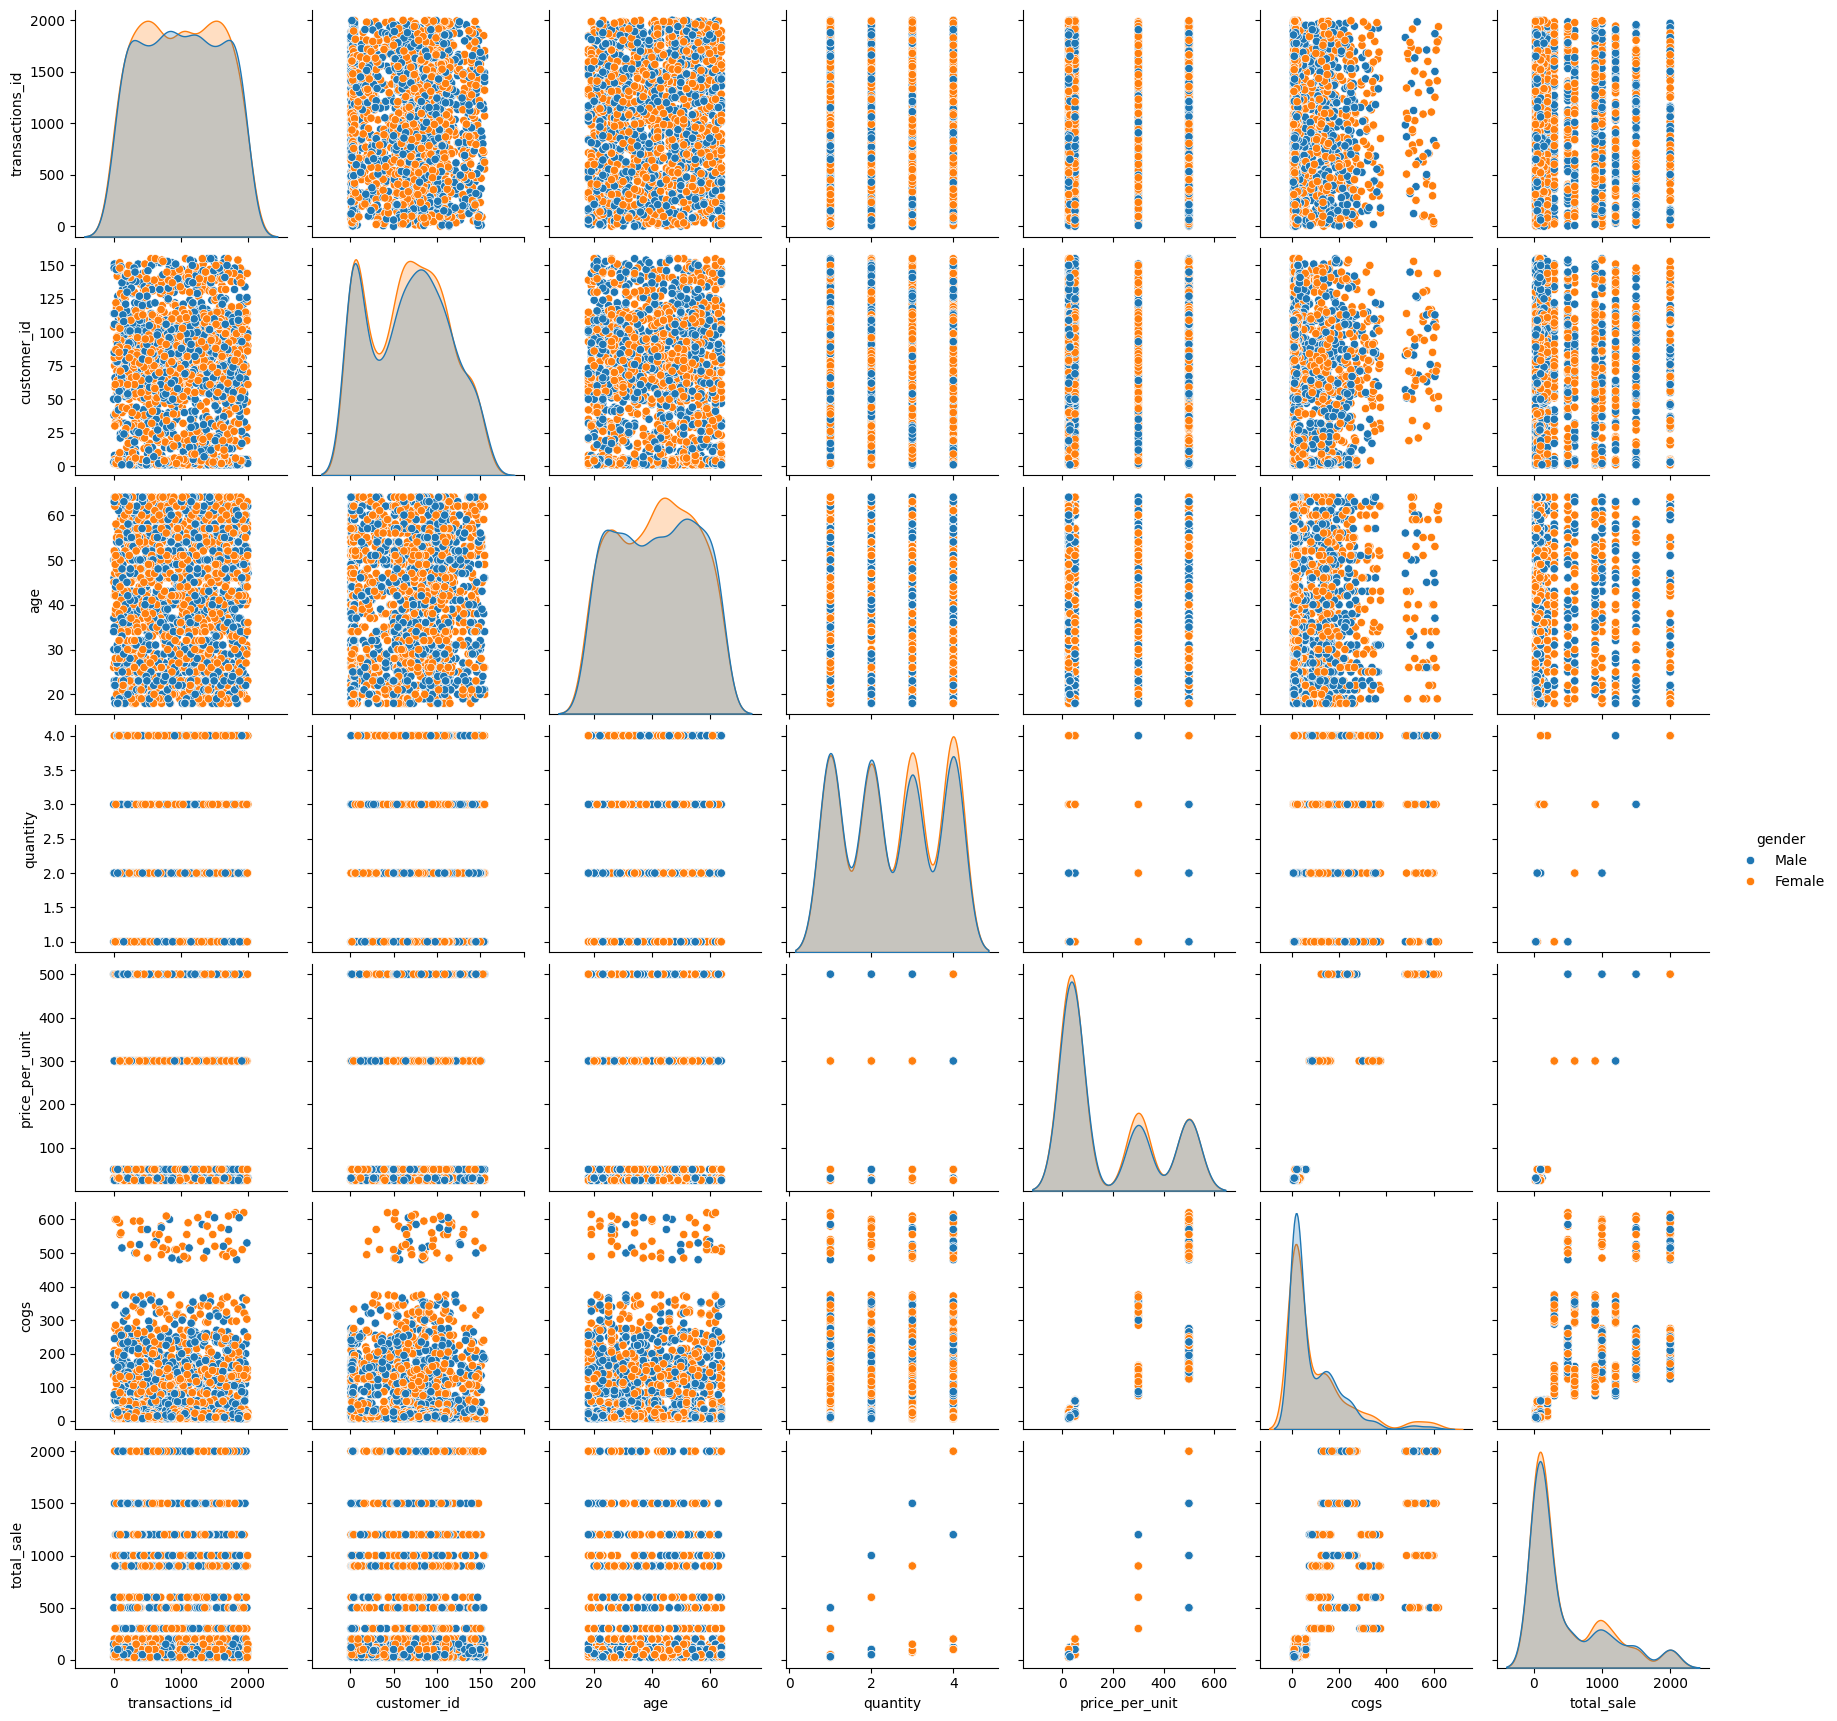

In [88]:
#df=df.drop('transactions_id',axis=1)
sns.pairplot(df,hue='gender')

In [89]:
df.groupby(['category'])['total_sale'].mean()

category
Beauty         469.378069
Clothing       444.118911
Electronics    459.358407
Name: total_sale, dtype: float64

**CLUSTERING - Univariate,Bivariate, Multivariate**

In [90]:
clustering1 = KMeans()

In [91]:
clustering1.fit(df[['total_sale']])

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [92]:
clustering1.labels_

array([2, 1, 6, ..., 3, 1, 3], shape=(1987,), dtype=int32)

In [93]:
df['Sales Cluster'] = clustering1.labels_
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,Sales Cluster
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,1
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,6
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,1


In [94]:
df['Sales Cluster'].value_counts()

Sales Cluster
3    991
2    220
7    208
5    170
6    108
1    100
4     98
0     92
Name: count, dtype: int64

In [95]:
clustering1.inertia_ #use to see distance between the centroid(inertia)

1986186.0155010836

In [96]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['total_sale','price_per_unit']])
    inertia_scores.append(kmeans.inertia_)

In [97]:
inertia_scores

[696002466.9602419,
 150642184.09873408,
 62516048.011952564,
 30051934.18439033,
 17678196.81065291,
 13726030.383106254,
 9660148.030165095,
 5361719.651179906,
 3178451.413751232,
 1119627.8843394613]

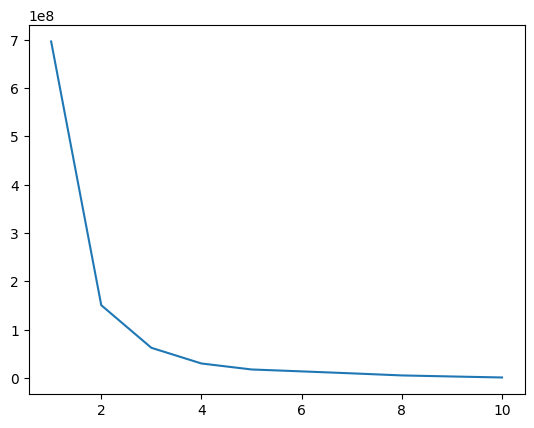

In [98]:
plt.plot(range(1,11),inertia_scores)

In [99]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantity', 'price_per_unit', 'cogs', 'total_sale',
       'Sales Cluster'],
      dtype='object')

In [100]:
df.groupby('Sales Cluster')['total_sale'].mean()

Sales Cluster
0     300.000000
1    1500.000000
2     943.636364
3      68.647830
4    2000.000000
5     541.176471
6    1200.000000
7     179.807692
Name: total_sale, dtype: float64

**Bivariate Clustering**

In [101]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['quantity']])
df['Quantity Cluster'] =clustering2.labels_
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,Sales Cluster,Quantity Cluster
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2,3
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,1,3
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,6,1
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2,3
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,1,3


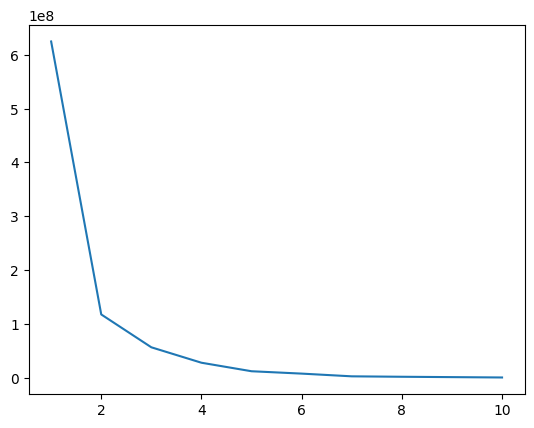

In [102]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['quantity', 'total_sale']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [103]:
#clustering2.cluster_centers_  #(use to see values of centers of clusters)

In [104]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['total_sale', 'quantity'])



In [105]:
print(centers.columns)

Index(['total_sale', 'quantity'], dtype='object')


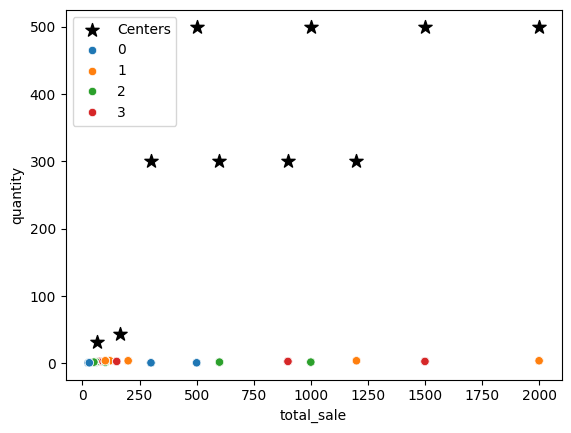

In [106]:
plt.figure()
plt.scatter(x=centers['total_sale'], y=centers['quantity'], s=100, c='black', marker='*', label='Centers')
sns.scatterplot(data=df, x='total_sale', y='quantity', hue='Quantity Cluster', palette='tab10')
plt.legend()
plt.savefig('clustering_bivariate.png')  #to save below image



In [50]:
pd.crosstab(df['Quantity Cluster'],df['gender'],normalize='index')  #normalize use to show values in percentage

gender,Female,Male
Quantity Cluster,,
0,0.492754,0.507246
1,0.521989,0.478011
2,0.495030,0.504970
3,0.527197,0.472803


In [105]:
df.groupby('Quantity Cluster')['total_sale'].mean()

Quantity Cluster
0    603.012552
1    176.063618
2    710.095602
3    331.366460
Name: total_sale, dtype: float64

**Multivariate Clustering**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scale = StandardScaler()

In [65]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,Sales Cluster,Quantity Cluster
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,3,3
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,1,3
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,5,1
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,3,3
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,1,3


In [66]:
#df = df.drop(['sale_date', 'sale_time'],axis =1)  #to delete multiple columns
dff = pd.get_dummies(df,drop_first=True)
#dff = pd.get_dummies(df)  #use get_dummies to convert string datatype to numbers e.g: male,female,clothing,etc.
dff.head()

,transactions_id,customer_id,age,quantity,price_per_unit,cogs,total_sale,Sales Cluster,Quantity Cluster,sale_date_2022-01-02,...,sale_time_22:54:00,sale_time_22:55:00,sale_time_22:56:00,sale_time_22:57:00,sale_time_22:58:00,sale_time_22:59:00,sale_time_23:00:00,gender_Male,category_Clothing,category_Electronics
0,180,117,41.0,3.0,300.0,129.0,900.0,3,3,False,...,False,False,False,False,False,False,False,True,True,False
1,522,52,46.0,3.0,500.0,145.0,1500.0,1,3,False,...,False,False,False,False,False,False,False,True,False,False
2,559,5,40.0,4.0,300.0,84.0,1200.0,5,1,False,...,False,False,False,False,False,False,False,False,True,False
3,1180,85,41.0,3.0,300.0,129.0,900.0,3,3,False,...,False,False,False,False,False,False,False,True,True,False
4,1522,48,46.0,3.0,500.0,235.0,1500.0,1,3,False,...,False,False,False,False,False,False,False,True,False,False


In [67]:
dff.columns

Index(['transactions_id', 'customer_id', 'age', 'quantity', 'price_per_unit',
       'cogs', 'total_sale', 'Sales Cluster', 'Quantity Cluster',
       'sale_date_2022-01-02',
       ...
       'sale_time_22:54:00', 'sale_time_22:55:00', 'sale_time_22:56:00',
       'sale_time_22:57:00', 'sale_time_22:58:00', 'sale_time_22:59:00',
       'sale_time_23:00:00', 'gender_Male', 'category_Clothing',
       'category_Electronics'],
      dtype='object', length=1417)

In [68]:
dff = dff[['age', 'quantity', 'price_per_unit',
       'cogs', 'total_sale','gender_Male', 'category_Clothing', 'category_Electronics']]
dff.head()

,age,quantity,price_per_unit,cogs,total_sale,gender_Male,category_Clothing,category_Electronics
0,41.0,3.0,300.0,129.0,900.0,True,True,False
1,46.0,3.0,500.0,145.0,1500.0,True,False,False
2,40.0,4.0,300.0,84.0,1200.0,False,True,False
3,41.0,3.0,300.0,129.0,900.0,True,True,False
4,46.0,3.0,500.0,235.0,1500.0,True,False,False


In [69]:
dff = scale.fit_transform(dff)

In [70]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5,6,7
0,-0.025718,0.429286,0.634000,0.278013,0.789901,1.018798,1.358935,-0.719689
1,0.340336,0.429286,1.690002,0.409159,1.859951,1.018798,-0.735870,-0.719689
2,-0.098928,1.312301,0.634000,-0.090834,1.324926,-0.981549,1.358935,-0.719689
3,-0.025718,0.429286,0.634000,0.278013,0.789901,1.018798,1.358935,-0.719689
4,0.340336,0.429286,1.690002,1.146855,1.859951,1.018798,-0.735870,-0.719689


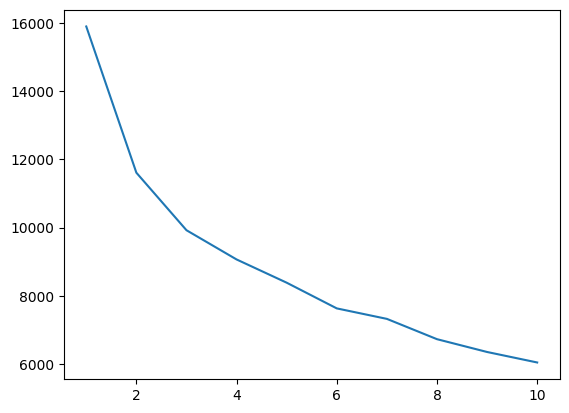

In [71]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [72]:
df

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale,Sales Cluster,Quantity Cluster
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,3,3
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,1,3
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,5,1
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,3,3
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1857,2022-11-09,12:15:00,109,Male,60.0,Electronics,2.0,25.0,7.5,50.0,7,0
1996,211,2022-09-12,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0,1,3
1997,650,2023-10-08,12:41:00,98,Male,55.0,Electronics,1.0,30.0,15.0,30.0,7,2
1998,1211,2023-11-22,14:59:00,82,Male,42.0,Beauty,3.0,500.0,235.0,1500.0,1,3


In [73]:
df.to_csv('Clustering with Customer Segmentation.csv')